In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [326]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_5436\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# week 11(?) homework


(2 pts) What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

(8 pts) Preprocess your dataset. 

(5 pts) Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

(5 pts) Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

(5 pts) Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.


Deductive resoning is: Using several broad claims to come to a small conculsion.

EX. Axiom: all things effect other things.

Conclusion: something that does not effect anything does not exist.



Inductive reasoning: Taking a pattern of occurances and making a broad claim.

EX. Pattern: Every time I listen to music I want to dance.

Conclusion: Music makes me want to dance.

In [3]:
from ucimlrepo import fetch_ucirepo 
  

adult = fetch_ucirepo(id=2) 
  

In [4]:
x = pd.DataFrame(adult.data.features)
y = pd.DataFrame(adult.data.targets)
  

In [5]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
x['Outcome'] = y

In [7]:
binary_sort = lambda x: 0 if x == '<=50K' else 1
x['Outcome'] = x['Outcome'].apply(binary_sort)

In [8]:
x = x.drop('fnlwgt',axis = 1)

# doesn't even say what this is in the repo, I'm assuming it's an id.

This function will be doing a lot of work since most of these columns are catagorical

workclass

marital-status

relationship

race

sex

education

occupation

native-country

In [16]:
def categorical_into_ordinal (DATAFRAME: pd.DataFrame,COLUMN: str,OUTCOME:str) -> pd.DataFrame:
    """Takes 3 arguments, the first is the dataframe you want to modify, 
    second is the CATEGORICAL column that you would like turned into ordinal categories based on how they correlated to outcome,
    third is the outcome column, ONLY BINARY."""

    no_na = DATAFRAME.dropna()
    #no na

    grouped = no_na.groupby([COLUMN,OUTCOME]).size().to_list()
    #grouping the column of interest by the outcome

    row_names = []
    for i in no_na[COLUMN]:
        if i not in row_names:
            row_names.append(i)

    row_names = sorted(row_names)
    #row names sorted

    int = 0
    negatives = 0
    positives = 1
    row_values = []

    while int < len(grouped):
        if int % 2 == 0:
            negatives = grouped[int]
            int+=1
        else:
            positives = grouped[int]
            
            row_values.append(positives/(positives+negatives))

            int+=1
    # the correlation of each row/category to the outcome
    q = 0

    value_replacer = lambda x: row_values[q] if x == row_names[q] else x

    while q < len(row_values):
        DATAFRAME[COLUMN] = DATAFRAME[COLUMN].apply(value_replacer)
        q+=1
    #replacing the values

    return(DATAFRAME[COLUMN])

categorical_into_ordinal(x,'workclass','Outcome')
        

0         0.01354
1        0.318611
2        0.029979
3        0.029979
4        0.029979
           ...   
48837    0.029979
48838         NaN
48839    0.029979
48840    0.029979
48841    0.603454
Name: workclass, Length: 48842, dtype: object

workclass

marital-status

relationship

race

sex

occupation

education

native-country

In [17]:
x.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Outcome
0,39,0.01354,0.602335,13,0.344777,0.416175,0.393453,0.492497,0.526317,2174,0,40,0.002949,0
1,50,0.318611,0.602335,13,0.622872,0.653681,0.624923,0.492497,0.526317,0,0,13,0.002949,0
2,38,0.029979,0.428516,9,0.390132,0.378509,0.393453,0.492497,0.526317,0,0,40,0.002949,0
3,53,0.029979,0.361397,7,0.622872,0.378509,0.624923,0.396472,0.526317,0,0,40,0.002949,0
4,28,0.029979,0.602335,13,0.622872,0.626678,0.634709,0.396472,0.388421,0,0,40,0.485294,0


looking good

{'whiskers': [<matplotlib.lines.Line2D at 0x2b98e7fbf10>,
 'caps': [<matplotlib.lines.Line2D at 0x2b98e843490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b98e7fbc70>],
 'medians': [<matplotlib.lines.Line2D at 0x2b98e8439d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b98e843c70>],
 'means': []}

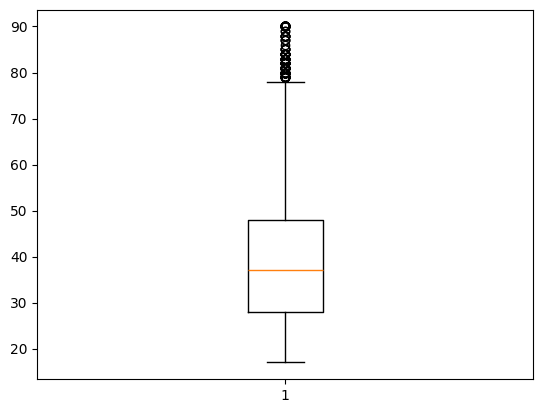

In [142]:
# i am manually doing this for every column, probably a funtion to check skew but im lazy
plt.boxplot(x['age'].dropna())

In [23]:
#median for skew
x['age'] = x['age'].fillna(x['age'].median)
x['workclass'] = pd.to_numeric(x['workclass'].fillna(x['workclass'].median),errors = 'coerce')
x['education'] = x['education'].fillna(x['education'].mean)
x['education-num'] = x['education-num'].fillna(x['education-num'].median)
x['marital-status'] = x['marital-status'].fillna(x['marital-status'].mean)
x['occupation'] = pd.to_numeric(x['occupation'].fillna(x['occupation'].median),errors = 'coerce')
x['relationship'] = x['relationship'].fillna(x['relationship'].mean)
x['race'] = x['race'].fillna(x['race'].median)
x['sex'] = x['sex'].fillna(x['sex'].mean)
x['native-country'] = pd.to_numeric(x['native-country'].fillna(x['native-country'].median),errors = 'coerce')



The logic here is iffy, but without predicting the categories with KNN or something, im not sure how you could fill nulls

In [24]:
x.dtypes

age                 int64
workclass         float64
education         float64
education-num       int64
marital-status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country    float64
Outcome             int64
dtype: object

## tree model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay


x_tree = x.drop('Outcome',axis=1)
y_tree = x['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x_tree,y_tree,test_size=.3,random_state=15)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [26]:
tree_model = tree.DecisionTreeClassifier(max_depth = 5, random_state= 14)

tree_model = tree_model.fit(x_train,y_train)
y_pred = tree_model.predict(x_test)

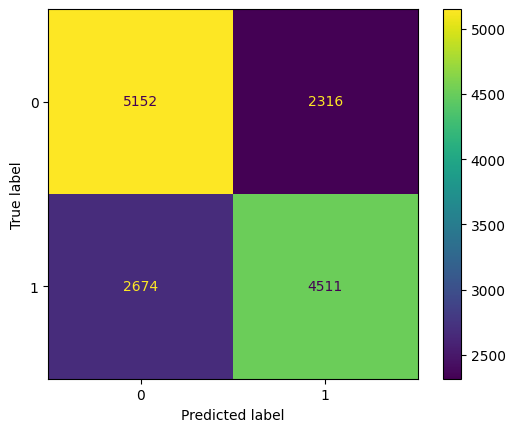

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

5 is best depth, stratify made it worse, standard scalar didn't do anything, dataset is balanced so no under/over scaling

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=60,random_state=16)
forest.fit(x_train, y_train)
forest.score(x_test,y_test)

0.646284037398485

In [29]:
forest = RandomForestClassifier(n_estimators=25,random_state=16)
forest.fit(x_train, y_train)
forest.score(x_test,y_test)

0.6420528219477241

Interestingly the forest didn't do better than the tree, so bagging isn't very useful on the dataset. So that means that there was little variance in the dataset

In [327]:
from xgboost import XGBClassifier

In [331]:
xgb_model = XGBClassifier()

xgb_model.fit(x_train,y_train)

y_pred = xgb_model.predict(x_test)

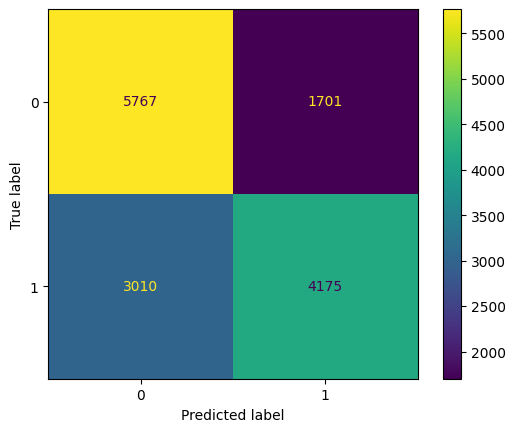

In [332]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

Same issues with the xgb. 

I'm guessing xgb is taking into account all the variables, when there was a high depth on the tree it increase the precision but decreased the recall

boosting is the only thing that I could think might help the model performance

OR, a better pre-processing method. 

Another way I thought of was to fill the null was: take the percent of the column that each responce takes up (I.E. 5/10 responces for occupation were "armed services") so we fill half the nulls with that responce, and the rest of the nulls with the apropriate percentage (rounded into an int instead of a float). This is naive though and doesn't account for covariance.

then,

just brute force with get_dummies

# week 12(?) quiz

https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [32]:
jz = x.dropna()

In [35]:
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x.drop('Outcome',axis=1).dropna(), jz['Outcome'], scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.652 (0.011)


Interesting error: PCA does not accept missing values encoded as NaN natively.

No null data in the set, but I think the fact that the dataframe had nulls it is is causing issues?

I just dropped the null values(bad), but that did fix it

overall the dimentionality reduction + logistic regression didn't do better (dropping nulls didn't help)

In [38]:
steps = [('pca', PCA(n_components=10)), ('m', tree_model)]
model = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x.drop('Outcome',axis=1).dropna(), jz['Outcome'], scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.655 (0.006)


tree model not significantly different, but more consistant with It's results.

again (dropping nulls didn't help)